# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [3]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Library for splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for building predictive models
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Library for hyperparameter tuning of models
from sklearn.model_selection import GridSearchCV

# Libraries for evaluating model performance
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Import the dataset
df = pd.read_csv("ExtraaLearn.csv")

# Create a copy of the dataset
df_copy = df.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
# Display the first five rows of the dataset
print(df_copy.head())


       ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activit

In [5]:
# Display the last five rows of the dataset
print(df_copy.tail())


           ID  age current_occupation first_interaction profile_completed  \
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
4607              15                    360                 2.170   
4608               8                   2327                 5.393   
4609               2                    212                 2.692   
4610               1                    154                 3.879   
4611               4                   2290                 2.075   

         last_activity print_media_type1 print_media_type2 digital_media  \
4607    Phone Activity                No      

In [6]:
# Display the column names of the dataset
print(df_copy.columns)


Index(['ID', 'age', 'current_occupation', 'first_interaction',
       'profile_completed', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'last_activity', 'print_media_type1',
       'print_media_type2', 'digital_media', 'educational_channels',
       'referral', 'status'],
      dtype='object')


In [7]:
# Display the shape of the dataset
print(df_copy.shape)


(4612, 15)


In [8]:
# Display the information of the dataset
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [9]:
# Check for missing values in the dataset
print(df_copy.isnull().sum())

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


In [10]:
# Display the summary statistics of the dataset
print(df_copy.describe())

               age  website_visits  time_spent_on_website  \
count  4612.000000     4612.000000            4612.000000   
mean     46.201214        3.566782             724.011275   
std      13.161454        2.829134             743.828683   
min      18.000000        0.000000               0.000000   
25%      36.000000        2.000000             148.750000   
50%      51.000000        3.000000             376.000000   
75%      57.000000        5.000000            1336.750000   
max      63.000000       30.000000            2537.000000   

       page_views_per_visit       status  
count           4612.000000  4612.000000  
mean               3.026126     0.298569  
std                1.968125     0.457680  
min                0.000000     0.000000  
25%                2.077750     0.000000  
50%                2.792000     0.000000  
75%                3.756250     1.000000  
max               18.434000     1.000000  


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [11]:
# Create a list of all categorical variables for further analysis
categorical_columns = list(df_copy.select_dtypes("object").columns)

# Print the count of each unique value in each categorical column for insights
for column in categorical_columns:
    print(df_copy[column].value_counts())
    print("-" * 50)

# Check the number of unique values in the "ID" column to assess its uniqueness
unique_id_count = df_copy["ID"].nunique()
print(f"Number of unique IDs: {unique_id_count}")

# Remove the "ID" column from the dataset as it is not needed for analysis
df_copy.drop(["ID"], axis=1, inplace=True)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name

### Univariate Analysis

c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Number of leads with no website visits: 174


c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


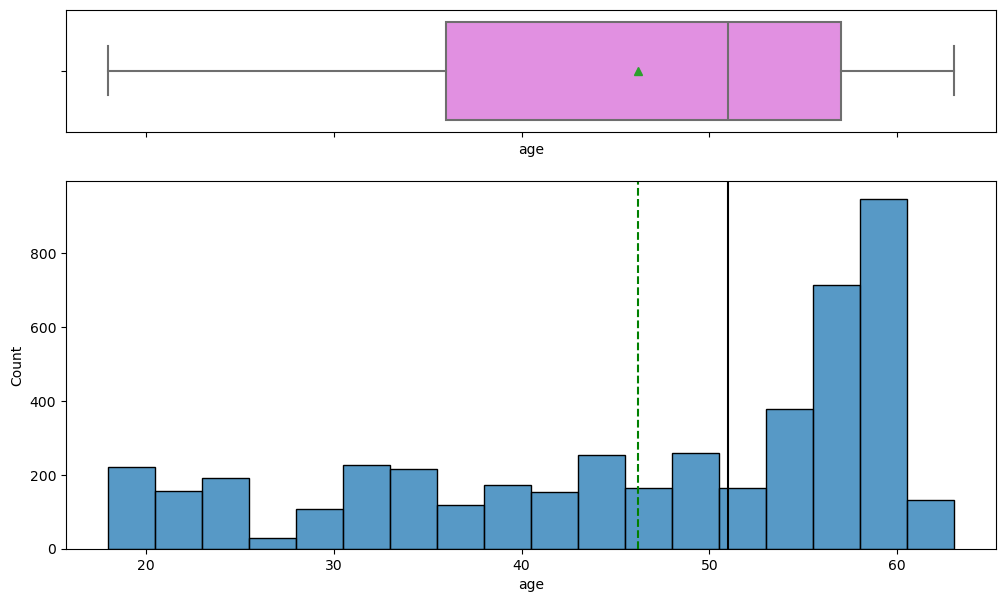

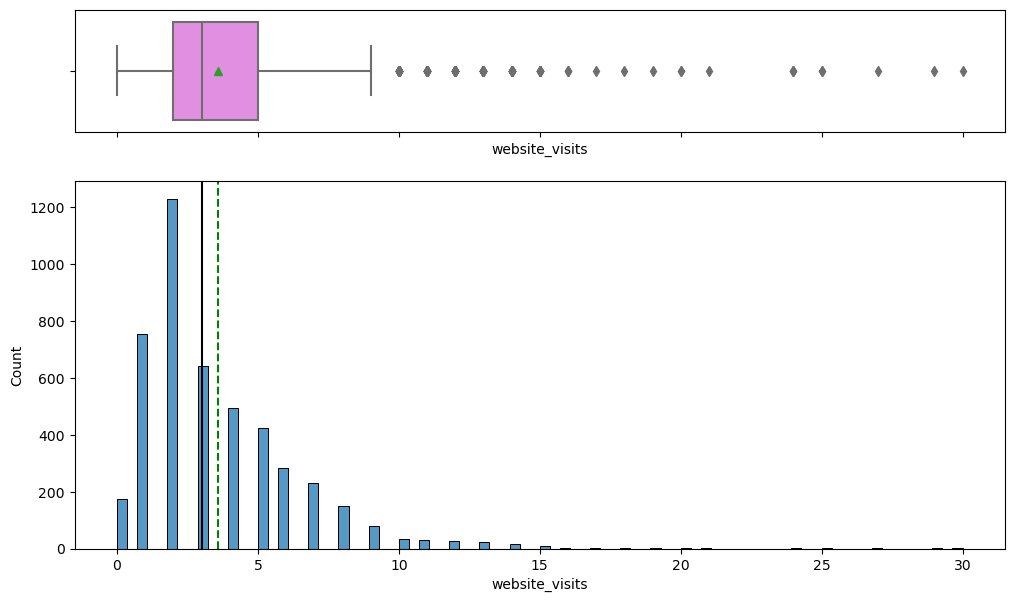

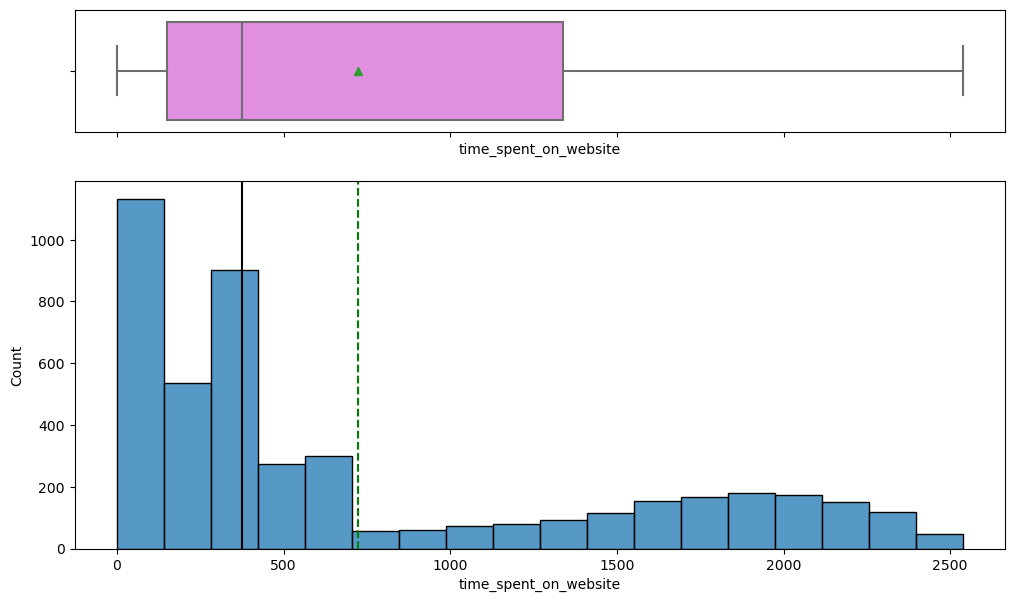

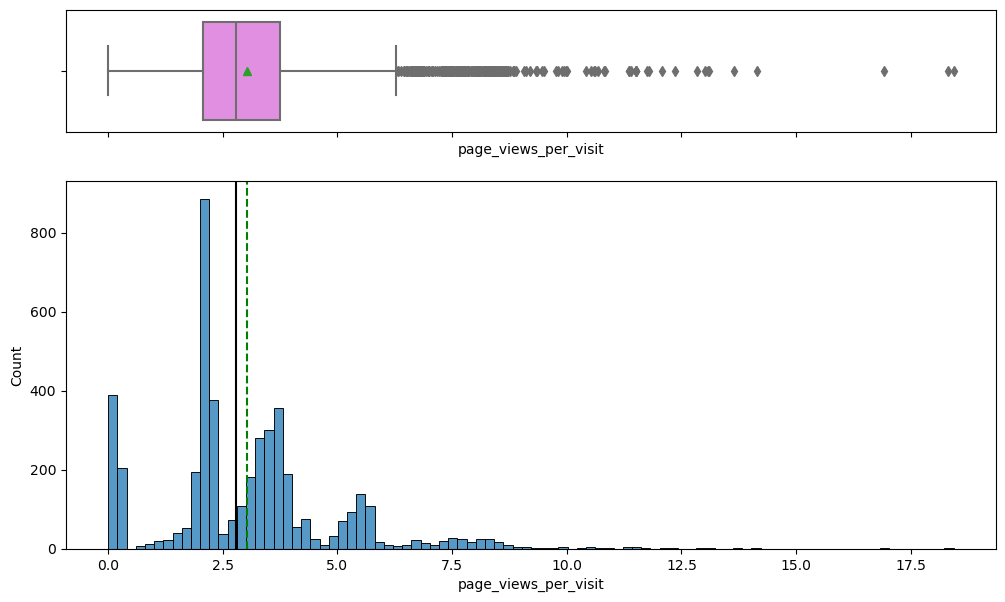

In [12]:
# Function to create a combined boxplot and histogram for visualizing distributions
def plot_histogram_and_boxplot(dataframe, feature_name, figsize=(12, 7), show_kde=False, num_bins=None):
    """
    Creates a boxplot and histogram for a given feature.

    dataframe: DataFrame containing the data
    feature_name: Column name for which to create the plots
    figsize: Size of the figure (default is (12, 7))
    show_kde: Whether to display the kernel density estimate (default is False)
    num_bins: Number of bins for the histogram (default is None)
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Two rows for boxplot and histogram
        sharex=True,  # Share the x-axis
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    
    sns.boxplot(data=dataframe, x=feature_name, ax=ax_box, showmeans=True, color="violet")  # Boxplot
    sns.histplot(data=dataframe, x=feature_name, kde=show_kde, ax=ax_hist, bins=num_bins, palette="winter") if num_bins else sns.histplot(data=dataframe, x=feature_name, kde=show_kde, ax=ax_hist)  # Histogram
    
    ax_hist.axvline(dataframe[feature_name].mean(), color="green", linestyle="--")  # Mean line
    ax_hist.axvline(dataframe[feature_name].median(), color="black", linestyle="-")  # Median line

# Analyze the distribution of ages
plot_histogram_and_boxplot(df_copy, "age") 

# Analyze the distribution of website visits
plot_histogram_and_boxplot(df_copy, "website_visits")  # Plot for website visits

# Count how many leads have not visited the website
no_visits_count = df_copy[df_copy["website_visits"] == 0].shape[0]
print(f"Number of leads with no website visits: {no_visits_count}")

# Analyze the distribution of time spent on the website
plot_histogram_and_boxplot(df_copy, "time_spent_on_website")  # Plot for time spent on website

# Analyze the distribution of page views per visit
plot_histogram_and_boxplot(df_copy, "page_views_per_visit")  # Plot for page views per visit

### Function to Create Labeled Barplots

In [15]:
# Function to create barplots with labels for better readability
def create_labeled_barplot(dataframe, feature_name, show_percentage=False, top_n=None):
    """
    Creates a barplot with counts or percentages labeled on top.

    dataframe: DataFrame containing the data
    feature_name: Column name for which to create the barplot
    show_percentage: Whether to display percentages instead of counts (default is False)
    top_n: Number of top categories to display (default is None, which shows all)
    """
    total_count = len(dataframe[feature_name])  # Total number of entries in the column
    unique_count = dataframe[feature_name].nunique()
    
    plt.figure(figsize=(unique_count + 1, 5) if top_n is None else (top_n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    
    ax = sns.countplot(
        data=dataframe,
        x=feature_name,
        palette="Paired",
        order=dataframe[feature_name].value_counts().index[:top_n].sort_values(),
    )

    for p in ax.patches:
        label = "{:.1f}%".format(100 * p.get_height() / total_count) if show_percentage else p.get_height()  # Label for each bar
        x = p.get_x() + p.get_width() / 2  # X position for label
        y = p.get_height()  # Y position for label

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Annotate the bar

    plt.show()  # Display the plot


### Barplots

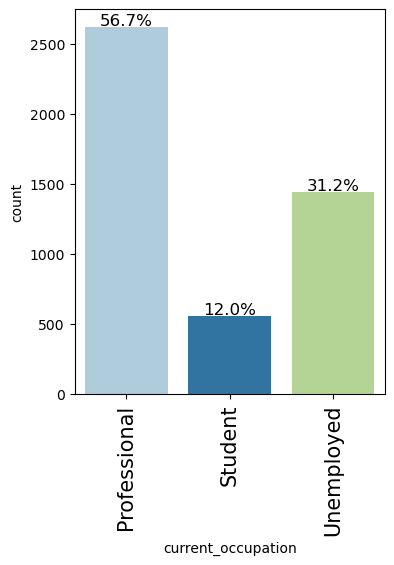

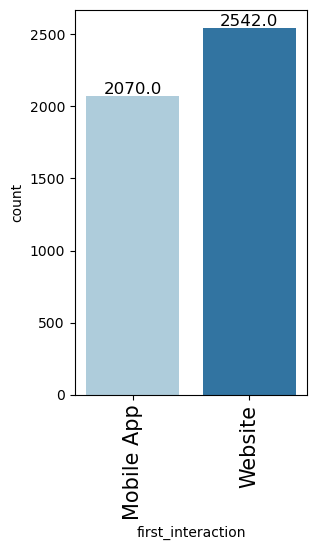

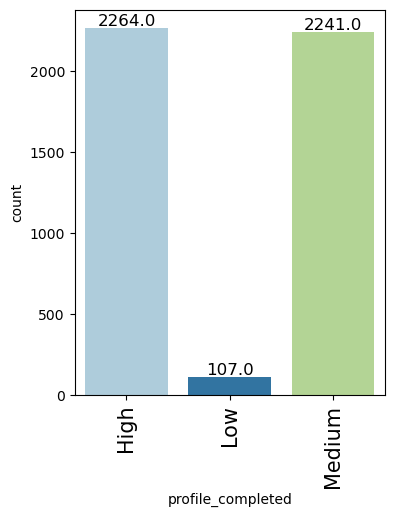

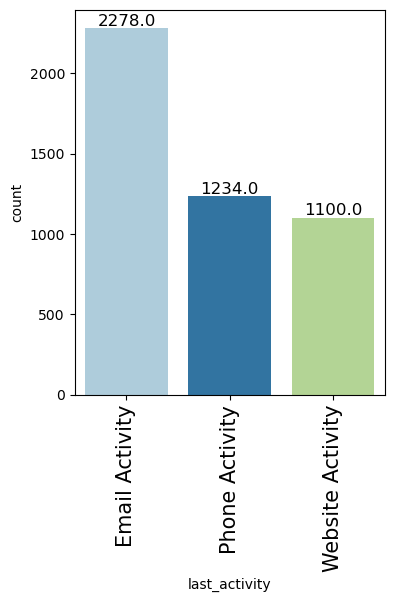

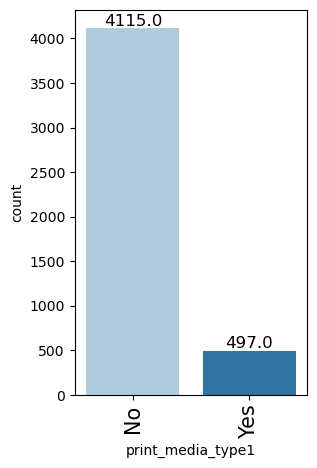

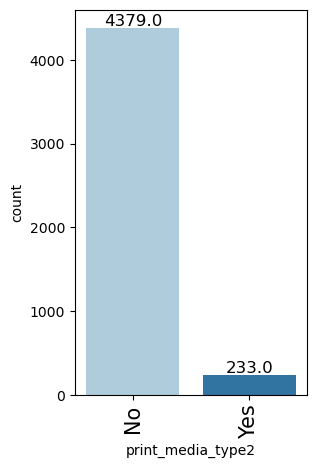

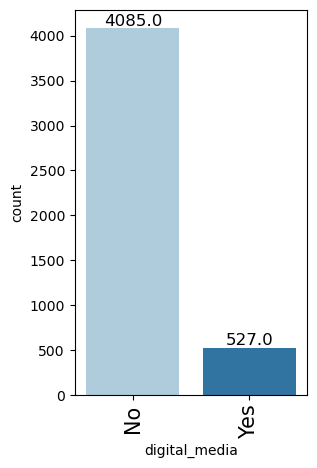

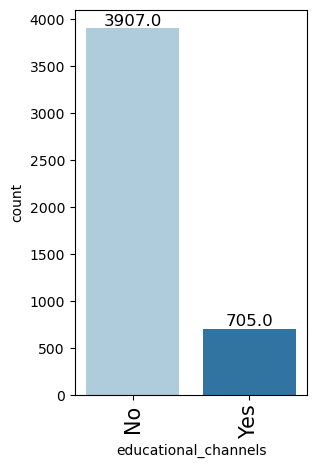

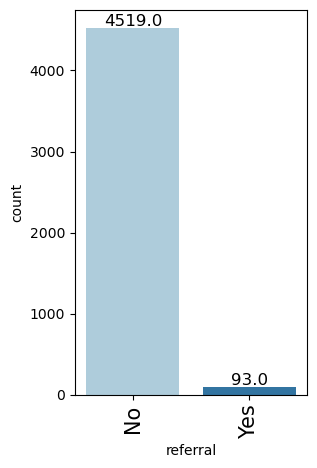

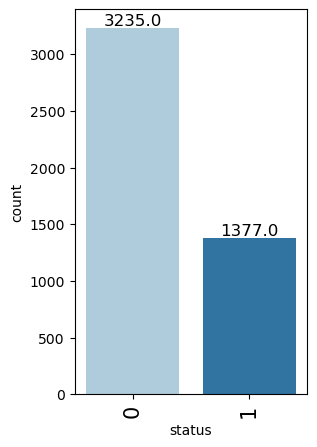

In [14]:
# Analyze the distribution of current occupation
create_labeled_barplot(df_copy, "current_occupation", show_percentage=True)

# Analyze the distribution of first interaction
create_labeled_barplot(df_copy, "first_interaction")  # Plot for first interaction

# Analyze the distribution of profile completion
create_labeled_barplot(df_copy, "profile_completed")  # Plot for profile completion

# Analyze the distribution of last activity
create_labeled_barplot(df_copy, "last_activity")  # Plot for last activity

# Analyze the distribution of print media type 1
create_labeled_barplot(df_copy, "print_media_type1")  # Plot for print media type 1

# Analyze the distribution of print media type 2
create_labeled_barplot(df_copy, "print_media_type2")  # Plot for print media type 2

# Analyze the distribution of digital media
create_labeled_barplot(df_copy, "digital_media")  # Plot for digital media

# Analyze the distribution of educational channels
create_labeled_barplot(df_copy, "educational_channels")  # Plot for educational channels

# Analyze the distribution of referrals
create_labeled_barplot(df_copy, "referral")  # Plot for referrals

# Analyze the distribution of lead status
create_labeled_barplot(df_copy, "status")  # Plot for lead status

### Bivariate Analysis

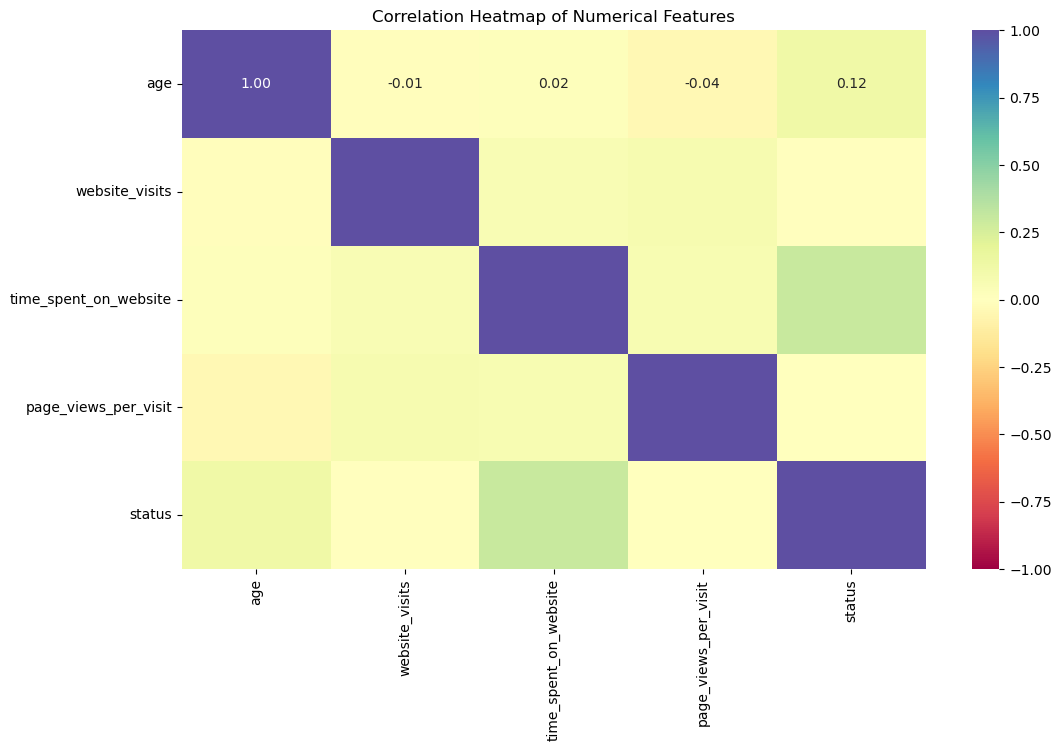

In [16]:
# Generate a correlation heatmap for numerical features to identify relationships
numerical_columns = df_copy.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_copy[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Additional Analysis

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


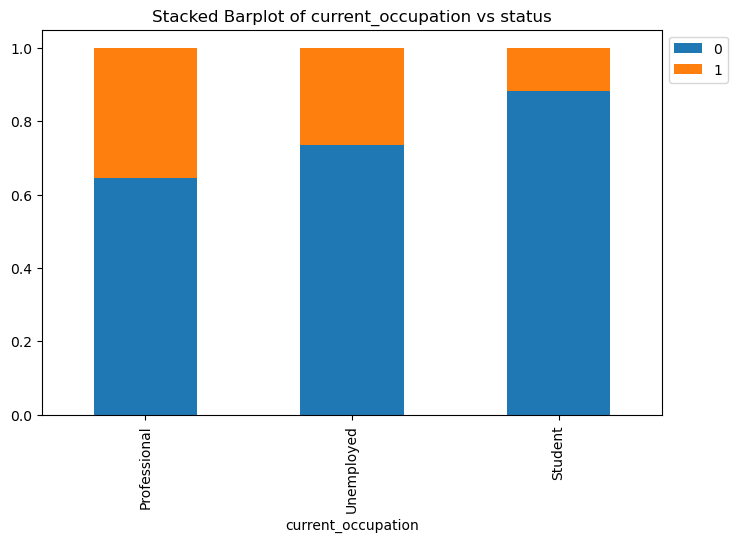

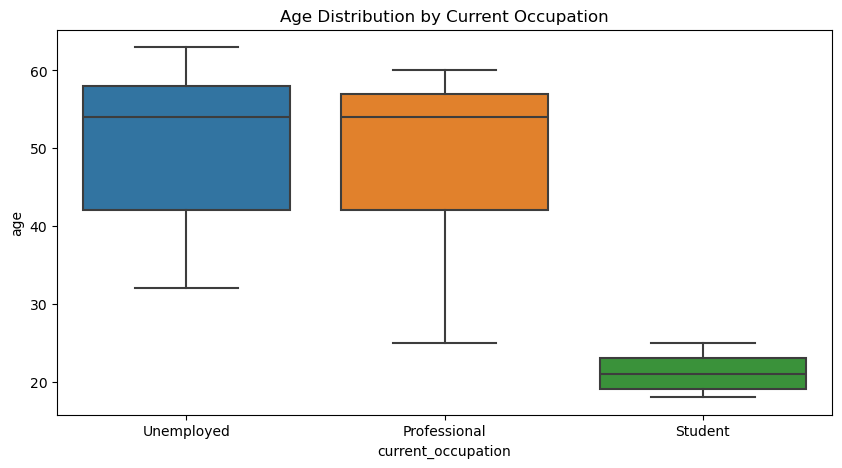

                     count       mean       std   min   25%   50%   75%   max
current_occupation                                                           
Professional        2616.0  49.347477  9.890744  25.0  42.0  54.0  57.0  60.0
Student              555.0  21.144144  2.001114  18.0  19.0  21.0  23.0  25.0
Unemployed          1441.0  50.140180  9.999503  32.0  42.0  54.0  58.0  63.0
status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


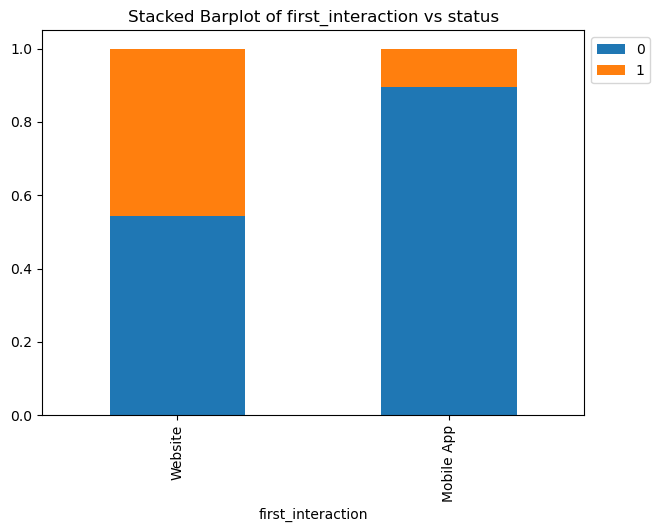

c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


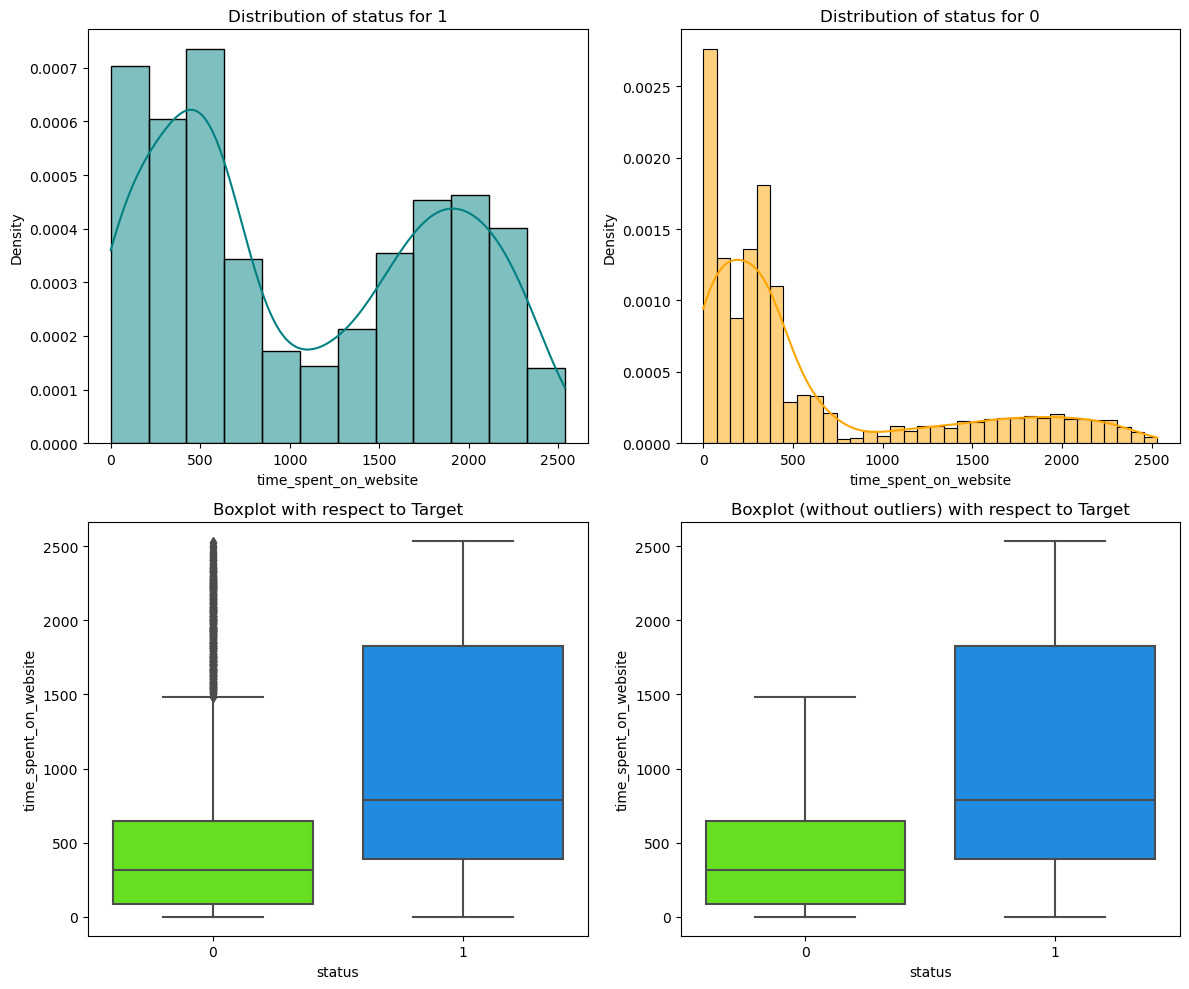

Median time spent on website by status:
status
0    317.0
1    789.0
Name: time_spent_on_website, dtype: float64


c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


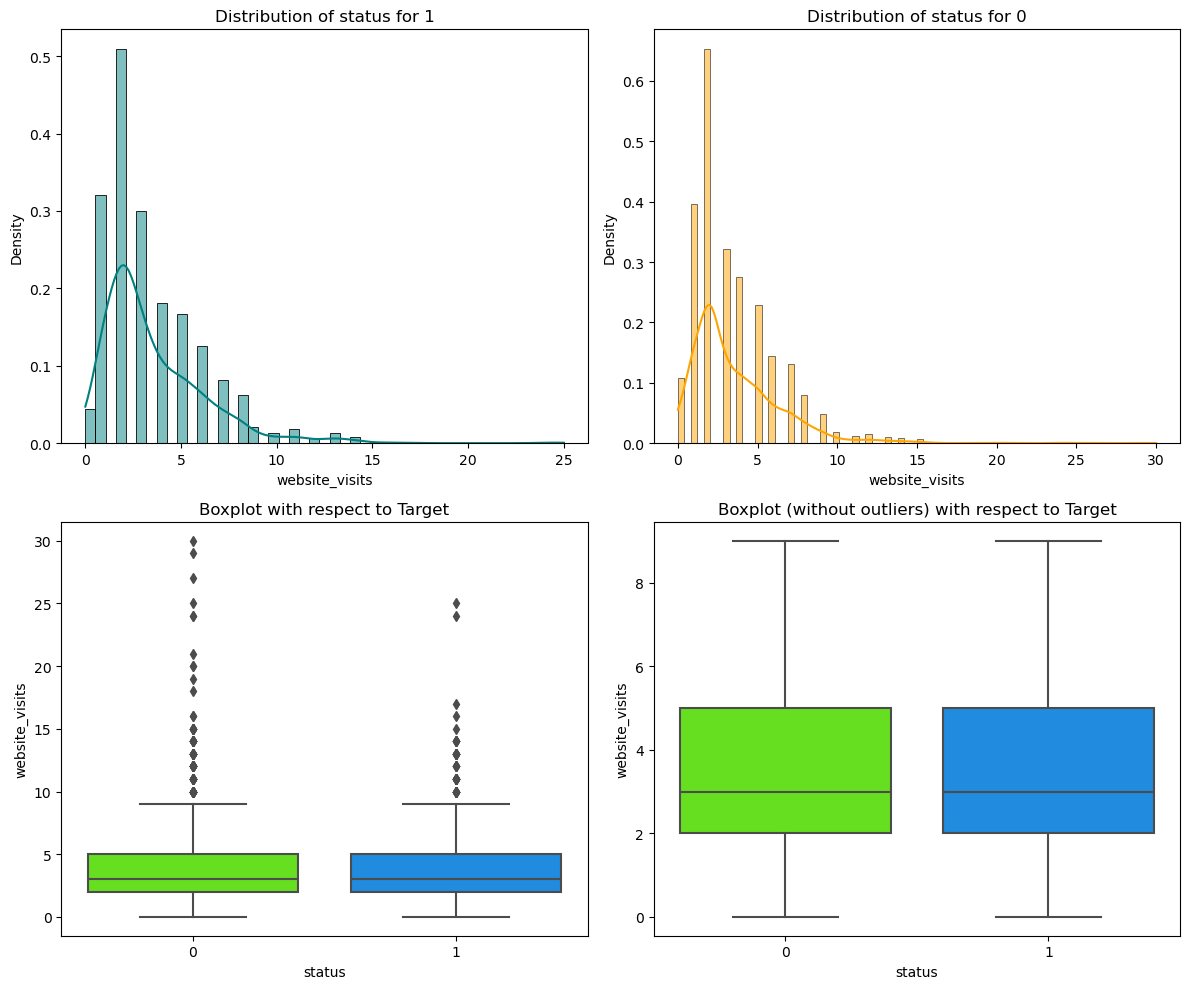

c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aasav\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


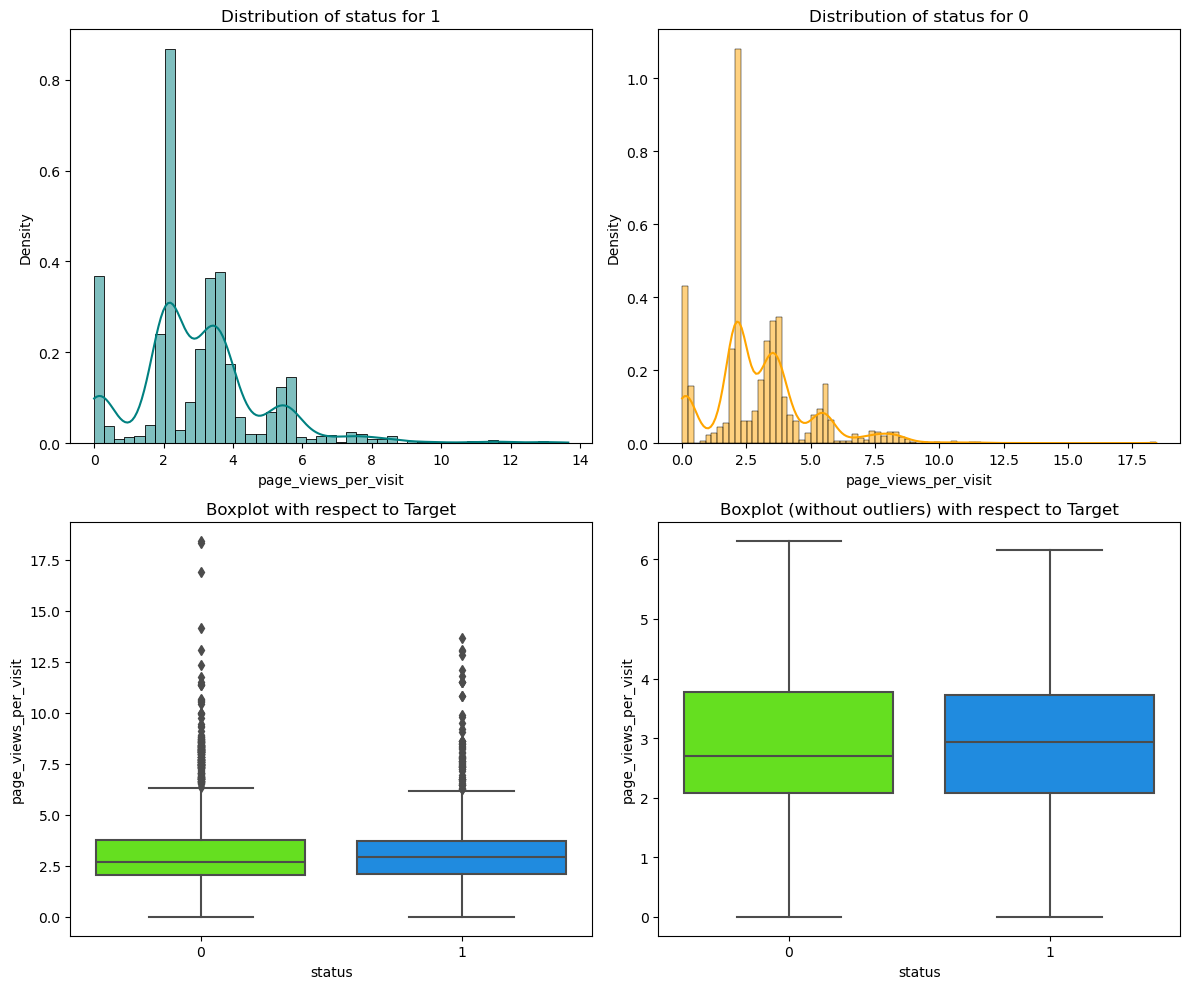

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


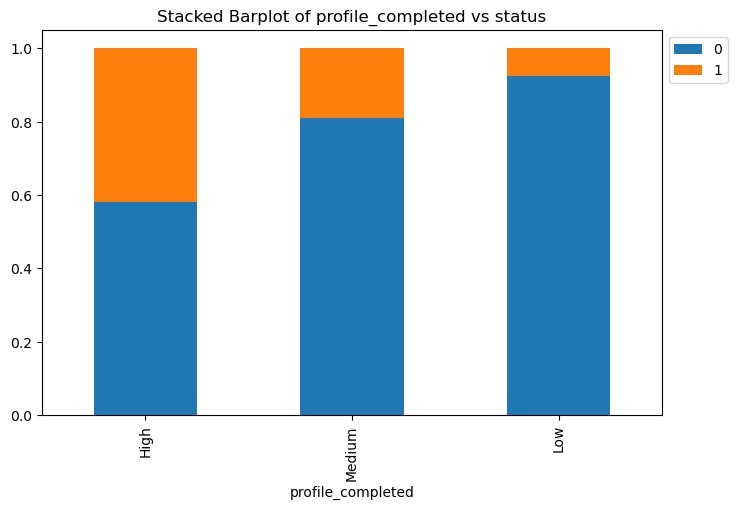

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


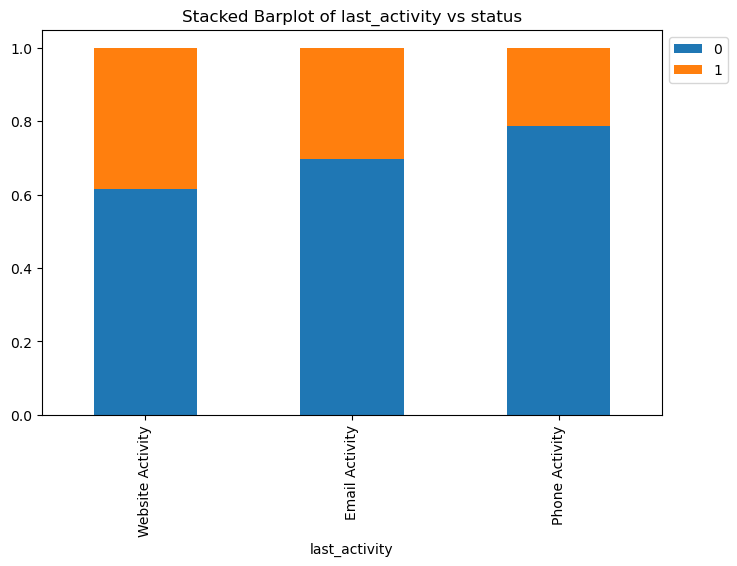

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


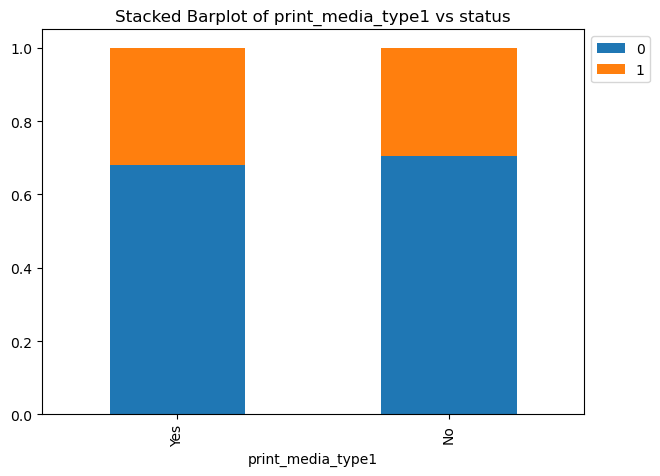

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


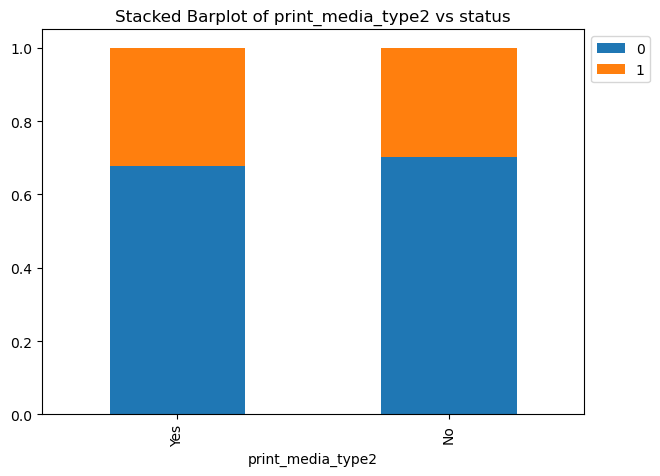

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


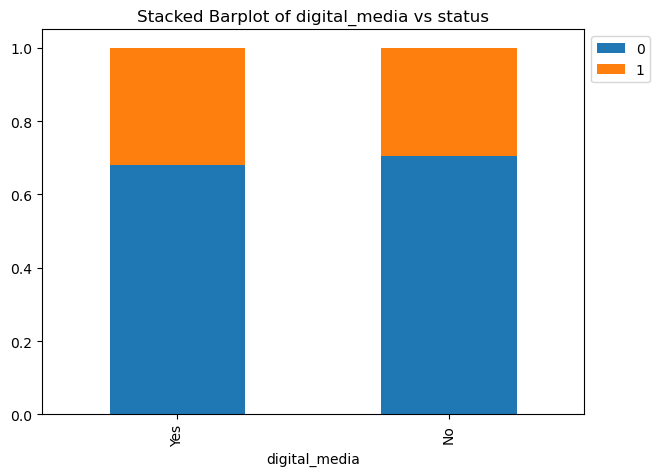

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


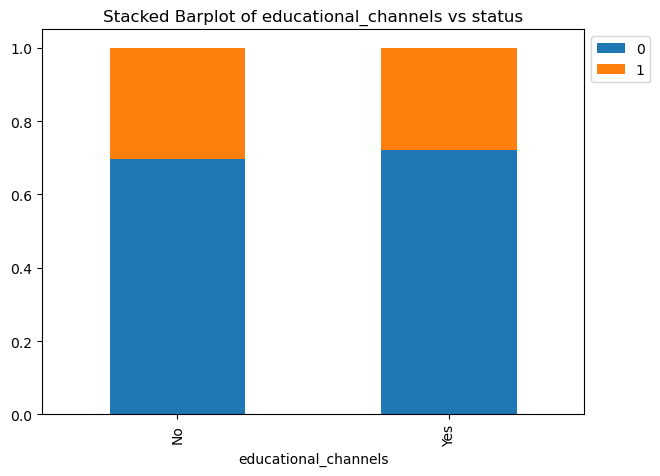

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


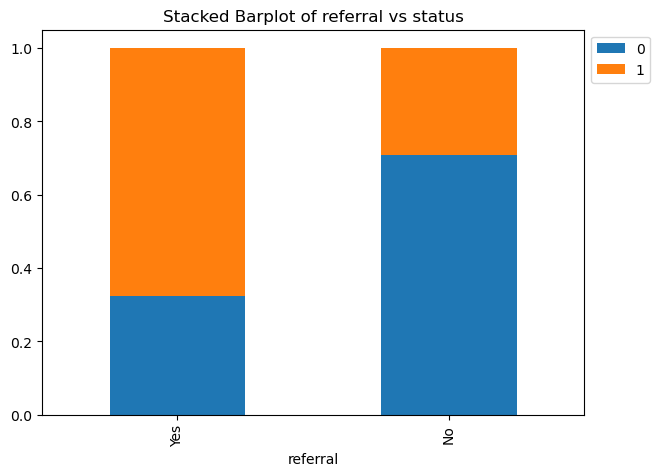

In [17]:
# Function to plot distributions with respect to the target variable
def plot_distribution_with_target(dataframe, predictor_name, target_name):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    unique_targets = dataframe[target_name].unique()

    axs[0, 0].set_title(f"Distribution of {target_name} for {unique_targets[0]}")
    sns.histplot(
        data=dataframe[dataframe[target_name] == unique_targets[0]],
        x=predictor_name,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title(f"Distribution of {target_name} for {unique_targets[1]}")
    sns.histplot(
        data=dataframe[dataframe[target_name] == unique_targets[1]],
        x=predictor_name,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot with respect to Target")
    sns.boxplot(data=dataframe, x=target_name, y=predictor_name, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) with respect to Target")
    sns.boxplot(
        data=dataframe,
        x=target_name,
        y=predictor_name,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# Function to create stacked barplots for categorical analysis
def create_stacked_barplot(dataframe, predictor_name, target_name):
    """
    Print the category counts and plot a stacked bar chart

    dataframe: DataFrame
    predictor_name: Independent variable
    target_name: Target variable
    """
    unique_count = dataframe[predictor_name].nunique()
    sorter = dataframe[target_name].value_counts().index[-1]
    contingency_table = pd.crosstab(dataframe[predictor_name], dataframe[target_name], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(contingency_table)
    print("-" * 120)
    
    normalized_table = pd.crosstab(dataframe[predictor_name], dataframe[target_name], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    normalized_table.plot(kind="bar", stacked=True, figsize=(unique_count + 5, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f"Stacked Barplot of {predictor_name} vs {target_name}")
    plt.show()

# Analyze the impact of current occupation on lead conversion
create_stacked_barplot(df_copy, "current_occupation", "status")

# Analyze the impact of age on lead conversion
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_copy, x=df_copy["current_occupation"], y=df_copy["age"])
plt.title("Age Distribution by Current Occupation")
plt.show()
age_description = df_copy.groupby(["current_occupation"])["age"].describe()
print(age_description)

# Analyze the impact of first interaction on lead conversion
create_stacked_barplot(df_copy, "first_interaction", "status")  # Plot for first interaction and status

# Analyze the impact of time spent on website on lead conversion
plot_distribution_with_target(df_copy, "time_spent_on_website", "status")

# Check the median value of time spent on website by status
median_time_spent = df_copy.groupby(["status"])["time_spent_on_website"].median()
print(f"Median time spent on website by status:\n{median_time_spent}")

# Analyze the impact of website visits on lead conversion
plot_distribution_with_target(df_copy, "website_visits", "status")  # Plot for website visits and status

# Analyze the impact of page views per visit on lead conversion
plot_distribution_with_target(df_copy, "page_views_per_visit", "status")  # Plot for page views per visit and status

# Analyze the impact of profile completion on lead conversion
create_stacked_barplot(df_copy, "profile_completed", "status")  # Plot for profile completion and status

# Analyze the impact of last activity on lead conversion
create_stacked_barplot(df_copy, "last_activity", "status")  # Plot for last activity and status

# Analyze the impact of print media type 1 on lead conversion
create_stacked_barplot(df_copy, "print_media_type1", "status")  # Plot for print media type 1 and status

# Analyze the impact of print media type 2 on lead conversion
create_stacked_barplot(df_copy, "print_media_type2", "status")  # Plot for print media type 2 and status

# Analyze the impact of digital media on lead conversion
create_stacked_barplot(df_copy, "digital_media", "status")  # Plot for digital media and status

# Analyze the impact of educational channels on lead conversion
create_stacked_barplot(df_copy, "educational_channels", "status")  # Plot for educational channels and status

# Analyze the impact of referral on lead conversion
create_stacked_barplot(df_copy, "referral", "status")  # Plot for referral and status

### Outlier Check

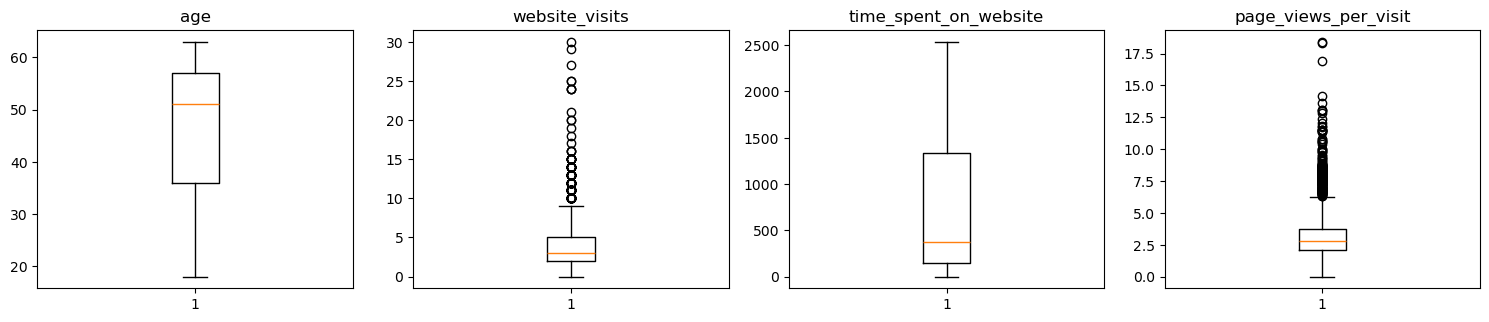

In [18]:
# Outlier detection using boxplots for numerical features
numeric_features = df_copy.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variable from the analysis
numeric_features.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_copy[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()

## Data Prep

In [19]:
# Prepare data for modeling by defining the target variable
Y = df_copy["status"]  # Define the target variable

# Create dummy variables for categorical features in the dataset
X = pd.get_dummies(df_copy.drop(["status"], axis=1), drop_first=True)  # Convert categorical variables to dummy variables

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

# Display the shapes of the training and testing sets
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)

# Display the percentage of classes in the training set
print("Percentage of classes in Training set:")
print(y_train.value_counts(normalize=True))

# Display the percentage of classes in the testing set
print("Percentage of classes in Test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of Test set :  (1384, 16)
Percentage of classes in Training set:
status
0    0.704151
1    0.295849
Name: proportion, dtype: float64
Percentage of classes in Test set:
status
0    0.695087
1    0.304913
Name: proportion, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Decision Tree model

## Do we need to prune the tree?

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations